Results for Neural Network Regressor:
{'Model': 'Neural Network Regressor', 'Train R2': 0.9566701865667543, 'Train RMSE': 0.03929643626203206, 'Train MSE': 0.0015442099028959483, 'Train MAE': 0.026261667864767163, 'Test R2': 0.9558690990325823, 'Test RMSE': 0.03969322276486972, 'Test MSE': 0.0015755519334615718, 'Test MAE': 0.02664296742104757, 'Train Size': 52377, 'Test Size': 22448}


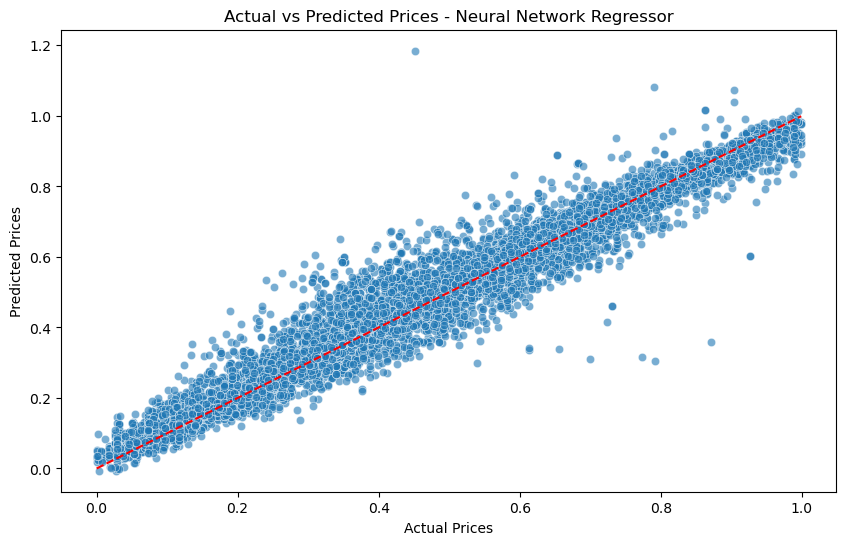

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV files
df1 = pd.read_csv('05_07_hotels_data_normalized.csv')
df2 = pd.read_csv('25_06_hotels_data_normalized.csv')
df3 = pd.read_csv('20_6_hotels_data_normalized.csv')

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True)

# Function to fill NaN values with the mean of the group
def fill_na_with_group_mean(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        df[col].fillna(df[col].mean(), inplace=True)
    return df

# Fill NaN values for the entire dataset
df = fill_na_with_group_mean(df)

# Function to run Neural Network Regression and calculate metrics
def run_neural_network_regressor(df):
    # Keep only numeric columns
    df = df.select_dtypes(include=[np.number])
    
    # Remove columns with all NaN values
    df = df.dropna(axis=1, how='all')
    
    # Ensure there are no remaining NaN values
    imputer = SimpleImputer(strategy='mean')
    df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    
    # Split the data into train and test sets
    X = df.drop(columns=['price_per_night','price'])
    y = df['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Define the model and parameter grid
    model = MLPRegressor(random_state=42)
    param_grid = {
        'hidden_layer_sizes': [(50,), (100,), (100, 50)],
        'max_iter': [500, 1000],
        'learning_rate_init': [0.001, 0.01, 0.1]
    }
    
    # Perform grid search
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='r2')
    grid_search.fit(X_train, y_train)
    
    # Best model from grid search
    best_model = grid_search.best_estimator_
    
    # Predictions
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    # Training metrics
    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    
    # Test metrics
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    results = {
        'Model': 'Neural Network Regressor',
        'Train R2': train_r2,
        'Train RMSE': train_rmse,
        'Train MSE': train_mse,
        'Train MAE': train_mae,
        'Test R2': test_r2,
        'Test RMSE': test_rmse,
        'Test MSE': test_mse,
        'Test MAE': test_mae,
        'Train Size': len(X_train),
        'Test Size': len(X_test)
    }
    
    return results, y_test, y_test_pred

# Run Neural Network Regressor
results, y_test, y_test_pred = run_neural_network_regressor(df)

# Display results
print("Results for Neural Network Regressor:")
print(results)

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices - Neural Network Regressor')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()


Results for Neural Network Regressor:
{'Model': 'Neural Network Regressor', 'Train R2': 0.8820514014390044, 'Train RMSE': 0.07212174894763985, 'Train MSE': 0.00520154667126639, 'Train MAE': 0.05628120353588121, 'Test R2': 0.882189556940847, 'Test RMSE': 0.07272652228998103, 'Test MSE': 0.0052891470443951075, 'Test MAE': 0.056622875861864895, 'Train Size': 52558, 'Test Size': 22525}


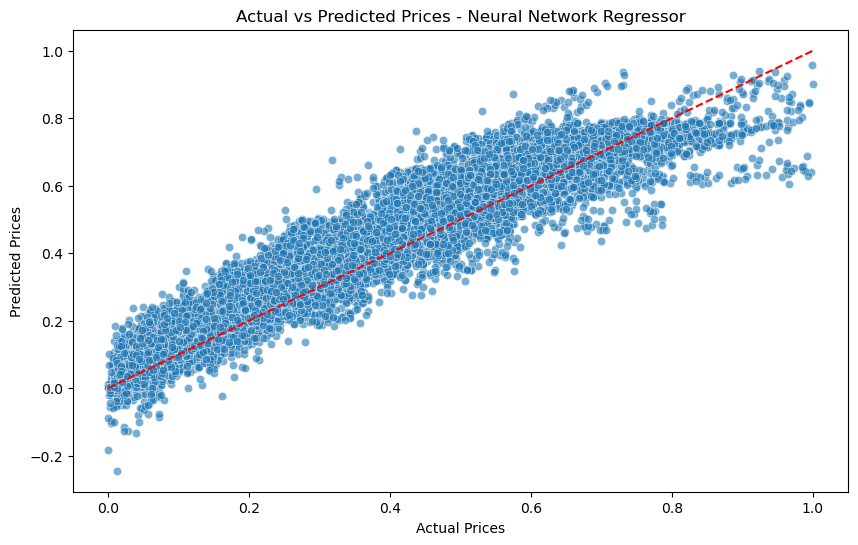

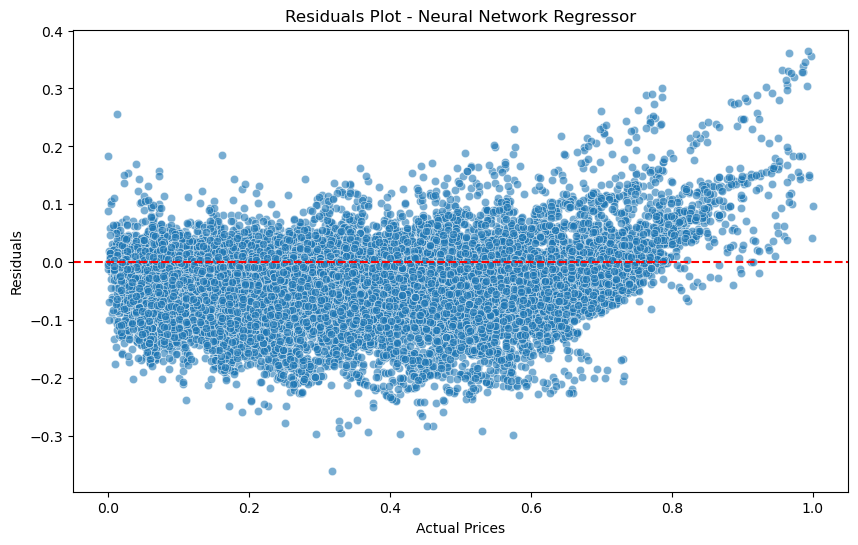

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df1 = pd.read_csv('05_07_clean_normalized.csv')
df2 = pd.read_csv('25_6_clean_normalized.csv')
df3 = pd.read_csv('20_6_clean_normalized.csv')

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True)

# Function to fill NaN values with the mean of the group
def fill_na_with_group_mean(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        df[col].fillna(df[col].mean(), inplace=True)
    return df

# Fill NaN values for the entire dataset
df = fill_na_with_group_mean(df)

# Function to run Neural Network Regression and calculate metrics
def run_neural_network_regressor(df):
    # Keep only numeric columns
    df = df.select_dtypes(include=[np.number])
    
    # Remove columns with all NaN values
    df = df.dropna(axis=1, how='all')
    
    # Ensure there are no remaining NaN values
    imputer = SimpleImputer(strategy='mean')
    df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    
    # Split the data into train and test sets
    X = df.drop(columns=['price_per_night','price'])
    y = df['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Define the model and parameter grid
    model = MLPRegressor(random_state=42)
    param_grid = {
        'hidden_layer_sizes': [(50,), (100,), (100, 50)],
        'max_iter': [500, 1000],
        'learning_rate_init': [0.001, 0.01, 0.1]
    }
    
    # Perform grid search
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='r2')
    grid_search.fit(X_train, y_train)
    
    # Best model from grid search
    best_model = grid_search.best_estimator_
    
    # Predictions
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    # Training metrics
    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    
    # Test metrics
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    results = {
        'Model': 'Neural Network Regressor',
        'Train R2': train_r2,
        'Train RMSE': train_rmse,
        'Train MSE': train_mse,
        'Train MAE': train_mae,
        'Test R2': test_r2,
        'Test RMSE': test_rmse,
        'Test MSE': test_mse,
        'Test MAE': test_mae,
        'Train Size': len(X_train),
        'Test Size': len(X_test)
    }
    
    return results, y_test, y_test_pred

# Run Neural Network Regressor
results, y_test, y_test_pred = run_neural_network_regressor(df)

# Display results
print("Results for Neural Network Regressor:")
print(results)

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices - Neural Network Regressor')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()



#Residual plot
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title(f'Residuals Plot - Neural Network Regressor')
plt.show()


In [12]:
#The Neural Network Regressor model with encoding significantly outperformed the model without encoding. 
#With encoding, the model achieved much higher R² values (Train R²: 0.9567, Test R²: 0.9559)
#and substantially lower error metrics (Train RMSE: 0.0393, Test RMSE: 0.0397) compared to the model without encoding 
#(Train R²: 0.5780, Test R²: 0.5742; Train RMSE: 0.1193, Test RMSE: 0.1207)

In [ ]:
#